In [17]:
import numpy as np
import cv2
from visio_per_computador.common import geometry
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)



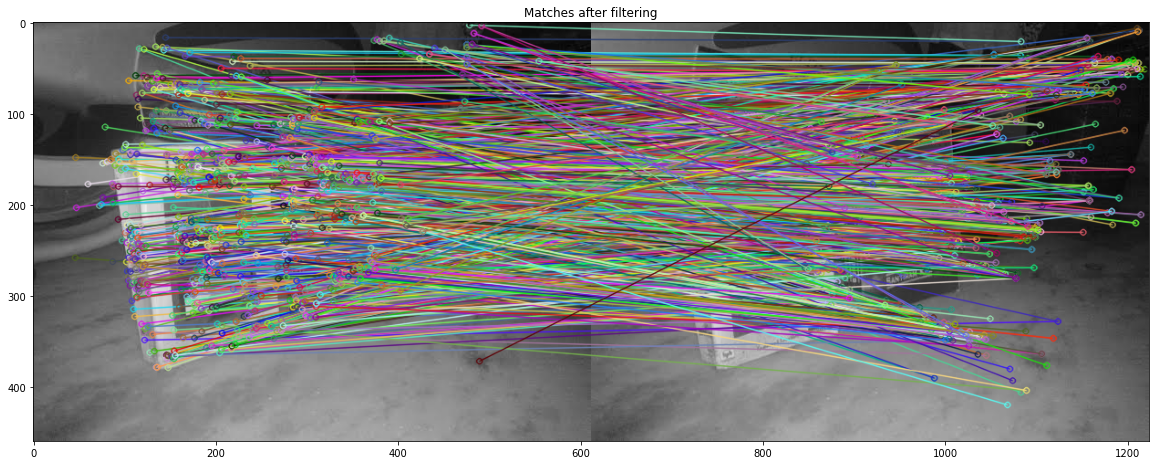

In [25]:
img1 = cv2.imread('../../in/epipolar/left.jpg',0)  #queryimage # left image
img2 = cv2.imread('../../in/epipolar/right.jpg',0) #trainimage # right image


# find the keypoints and descriptors with SIFT
kp1, des1 = geometry.get_kp_desc(method='sift', img=img1)
kp2, des2 = geometry.get_kp_desc(method='sift', img=img2)
res = cv2.drawMatches(img1, kp1, img1, kp2,
                      [m[0] for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(res)
plt.title('Matches after filtering')
plt.show()
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

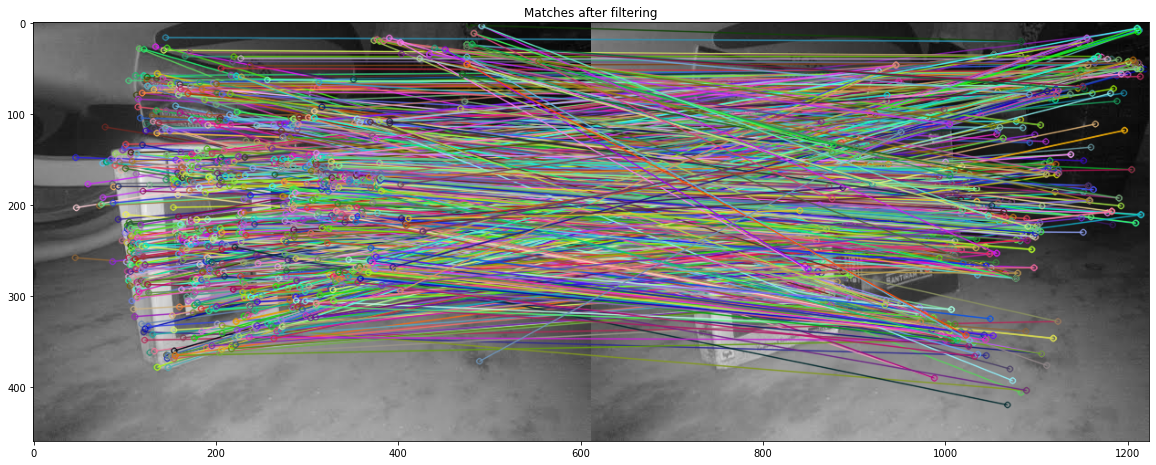

In [23]:
res = cv2.drawMatches(img1, kp1, img1, kp2,
                      [m[0] for m in matches], None,
                      flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(res)
plt.title('Matches after filtering')
plt.show()

In [19]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

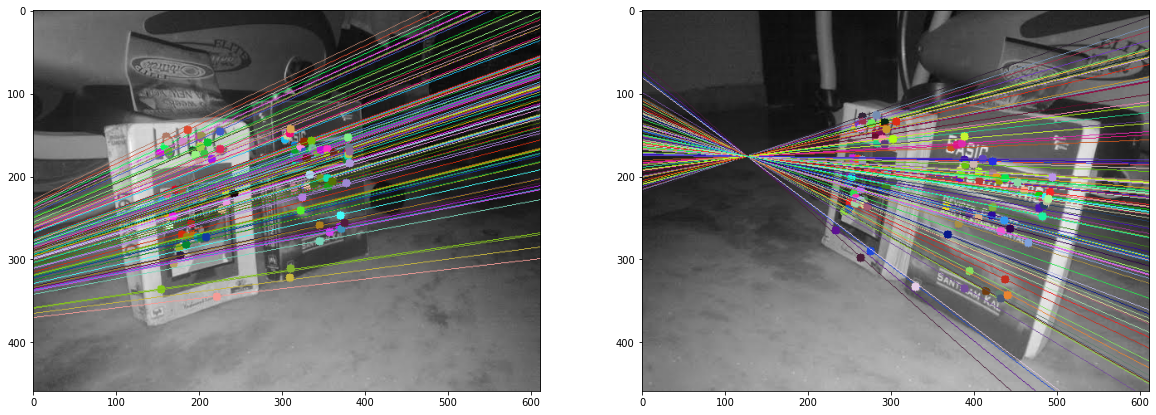

In [20]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = geometry.draw_epipolar_lines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = geometry.draw_epipolar_lines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()